<a href="https://colab.research.google.com/github/ViktorKolarov/SuperStore/blob/main/StoreUS_ViktorKolarov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#2
from google.colab import files
uploaded = files.upload()

Saving SuperStoreUS.xlsx to SuperStoreUS.xlsx


In [ ]:
#3
import io
df = pd.read_excel(io.BytesIO(uploaded['SuperStoreUS.xlsx']))

# Quick data info

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID,Order ID.1
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1936.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1634.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,114.793859,12.944672,985.828832,82365.924180,112681.077723
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137055,29362.828420,1141.112387,13.871565,2559.900167,19042.295798,59389.725675
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,-16476.838000,1.000000,2.250000,359.000000,65.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,-84.485400,5.000000,58.807500,86767.750000,48486.250000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.525000,48765.500000,1.476450,10.000000,202.395000,88376.000000,138057.500000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,116.201575,16.000000,802.945000,89957.000000,160172.750000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000,182906.000000


# Sales by month?

In [ ]:
#First date and time of the order
df['Order Date'].min()

Timestamp('2015-01-01 00:00:00')

In [ ]:
#Last date and time of the order
df['Order Date'].max()

Timestamp('2015-06-30 00:00:00')

In [ ]:
#Getting month and year from Order Date
df['month_year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
df['month_year']

0       2015-01
1       2015-06
2       2015-02
3       2015-05
4       2015-05
         ...   
1947    2015-03
1948    2015-03
1949    2015-03
1950    2015-04
1951    2015-02
Name: month_year, Length: 1952, dtype: object

In [ ]:
#Grouping month_year and Sales
df_trend = df.groupby('month_year').sum() ['Sales'].reset_index() #getting dataframe form by .reset_index
df_trend

,month_year,Sales
0,2015-01,274766.92
1,2015-02,326101.47
2,2015-03,271696.67
3,2015-04,389831.95
4,2015-05,306572.07
5,2015-06,355368.80


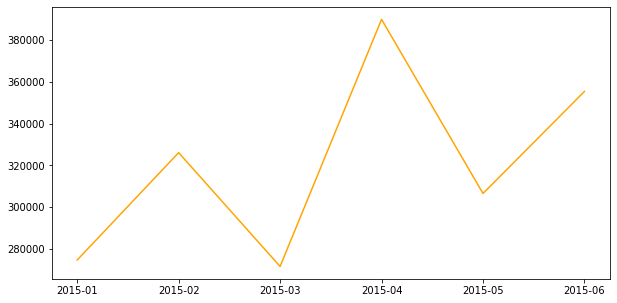

In [ ]:
#Visualisation of sales per month
plt.figure(figsize=(10,5)) #setting size
plt.plot(df_trend['month_year'], df_trend['Sales'], color = 'orange')
plt.show()

# Profit by month?

In [ ]:
df_profit = df.groupby('month_year').sum() ['Profit'].reset_index() #getting dataframe form by .reset_index
df_profit

,month_year,Profit
0,2015-01,1043.677500
1,2015-02,35944.658780
2,2015-03,103.159587
3,2015-04,53146.412502
4,2015-05,67002.732858
5,2015-06,66836.970610


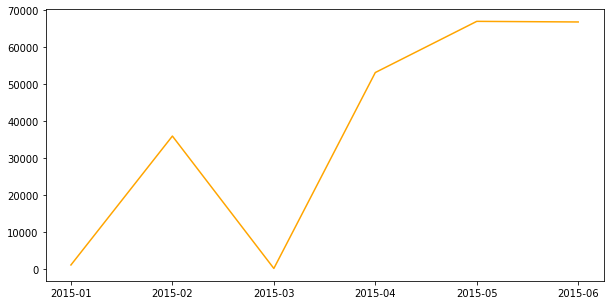

In [ ]:
#Visualisation of profit per month
plt.figure(figsize=(10,5)) #setting size
plt.plot(df_profit['month_year'], df_profit['Profit'], color = 'orange')
plt.show()

#Wich is the top product?

In [ ]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order ID.1,Status,month_year
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,65.0,Returned,2015-01
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,612.0,Returned,2015-06
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,614.0,Returned,2015-02
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,678.0,Returned,2015-05
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,710.0,Returned,2015-05


In [ ]:
#Grouping product name and sales
product_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])
product_sales

,Sales
Product Name,
"""While you Were Out"" Message Book, One Form per Page",39.64
"#10 White Business Envelopes,4 1/8 x 9 1/2",482.70
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",208.60
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",590.27
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",217.23
...,...
i1000plus,1434.51
i2000,3319.20
i270,1142.04


In [ ]:
#Sorting product_sales column
product_sales = product_sales.sort_values('Sales', ascending=False)

#top 10 products by sales
product_sales[:10]

,Sales
Product Name,
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,69013.48
Lexmark 4227 Plus Dot Matrix Printer,61071.73
Global Troy™ Executive Leather Low-Back Tilter,50871.21
Okidata ML395C Color Dot Matrix Printer,47611.09
Polycom ViewStation™ ISDN Videoconferencing Unit,46538.69
Economy Rollaway Files,35607.28
Smead Adjustable Mobile File Trolley with Lockable Top,23995.11
Hon 4700 Series Mobuis™ Mid-Back Task Chairs with Adjustable Arms,22554.43
"SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black",21253.25


#Which shipping method is used the most?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


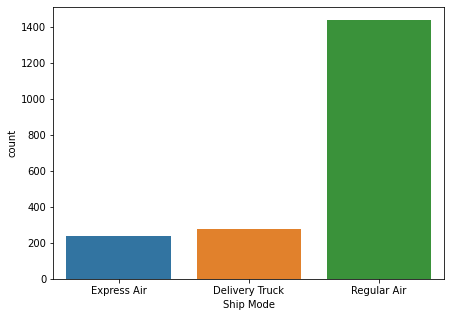

In [ ]:
#setting size
plt.figure(figsize=(7, 5))

#Showing the final result
sns.countplot(df['Ship Mode'])
plt.show()

# Which are the most profitable category and sub-category?

In [ ]:
cat_subcat_profit = pd.DataFrame(df.groupby(['Product Category', 'Product Sub-Category']).sum() ['Profit'])

In [ ]:
cat_subcat_profit.sort_values(['Product Category', 'Profit'], ascending=False)

Profit
Product Category Product Sub-Category                        
Technology       Telephones and Communication    40790.514240
                 Copiers and Fax                 23990.207580
                 Office Machines                  8824.390564
                 Computer Peripherals             1698.043980
Office Supplies  Binders and Binder Accessories  59296.389430
                 Appliances                      12594.820600
                 Paper                            7769.315070
                 Storage & Organization           7124.288200
                 Labels                           7028.159500
                 Pens & Art Supplies              -257.628800
                 Envelopes                       -1194.412500
                 Scissors, Rulers and Trimmers   -1291.095900
                 Rubber Bands                    -1544.826063
Furniture        Chairs & Chairmats              48695.836600
                 Office Furnishings              18724.119100
                 Bookcases                        -930.438400
                 Tables                          -7240.071364

# What products are most often sold together?

In [ ]:
#Creating new dataframe
new_df = df[ df['Order ID'].duplicated(keep=False)]

#Adding new col 'Grouped'
new_df['Grouped'] = new_df.groupby('Order ID')['Product Name'].transform(lambda x: ','.join(x))
new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
3,86838,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...
9,86836,"Staples Gold Paper Clips,StarTAC 7797"
14,42949,"Advantus Plastic Paper Clips,Hewlett Packard 6..."
16,87651,"Xerox 194,Newell 323"
23,89201,Storex DuraTech Recycled Plastic Frosted Binde...


In [ ]:

from itertools import combinations
from collections import Counter

In [ ]:
#Showing the final result
count = Counter()

for row in new_df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2))) #If we want to see more then 2 products, just change the number
  
for key, value in count.most_common(10):
  print(key, value)


('Imation Neon Mac Format Diskettes', ' 10/Pack') 4
(' DISKETTE 44766 HGHLD3.52HD/FM', ' 10/Pack') 4
('Avery Flip-Chart Easel Binder', ' Black') 4
('Global High-Back Leather Tilter', ' Burgundy') 4
('Tennsco Lockers', ' Gray') 4
('Bush Westfield Collection Bookcases', ' Fully Assembled') 3
('Memorex 4.7GB DVD+R', ' 3/Pack') 3
("O'Sullivan Elevations Bookcase", ' Cherry Finish') 3
('Memorex 4.7GB DVD+RW', ' 3/Pack') 3
('Bevis Round Conference Table Top', ' X-Base') 3


In [ ]:
df.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order ID.1,Status,month_year
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,65.0,Returned,2015-01
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,612.0,Returned,2015-06
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,614.0,Returned,2015-02
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,678.0,Returned,2015-05
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,710.0,Returned,2015-05


# Exporting

In [ ]:
#Sales by month
df_trend.to_csv('df_trend.csv', index=False)

In [ ]:
#Profit by month
df_profit.to_csv('df_profit.csv', index=False)

In [ ]:
#Top product
product_sales.to_csv('product_sales.csv', index=False)

In [ ]:
#The most profitable category and sub-category
cat_subcat_profit.to_csv('cat_subcat_profit.csv', index=False)

In [ ]:
#Products that are most often sold together
new_df.to_csv('new_df.csv', index=False)